In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split 

## import data 

In [32]:
data_trains = np.array(pd.read_table('data-IP/adult.data',sep = ',',header=None,engine='python'))
data = data_trains[:,:-1]
labels = data_trains[:,-1]

In [33]:
print(data.shape)
print(labels.shape)

(32561, 14)
(32561,)


In [3]:
for i in range(labels.shape[0]):
    if labels[i]==' <=50K':
        labels[i] = 0
    else:
        labels[i] = 1

In [34]:
print(data[0])

[39 ' State-gov' 77516 ' Bachelors' 13 ' Never-married' ' Adm-clerical'
 ' Not-in-family' ' White' ' Male' 2174 0 40 ' United-States']


In [35]:
data_test = np.array(pd.read_table('data-IP/adult.test',sep = ',',header=None,skiprows=[0],engine='python'))
x_test = data_test[:,:-1]
y_test = data_test[:,-1]

In [36]:
print(x_test.shape)
print(y_test.shape)

(16281, 14)
(16281,)


In [92]:
'''
train_set = np.concatenate((data, labels.reshape(-1,1)), axis = 1)
print(train_set.shape)
train_df = pd.DataFrame(train_set)
'''
#train_df = pd.read_table('data-IP/adult.data',sep = ',', dtype=)
train_df = pd.read_table(
    'data-IP/adult.data',sep = ',',
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        engine='python',
        na_values="?")
#test_df = pd.read_table('data-IP/adult.test',sep = ',')

train_df.tail()


,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


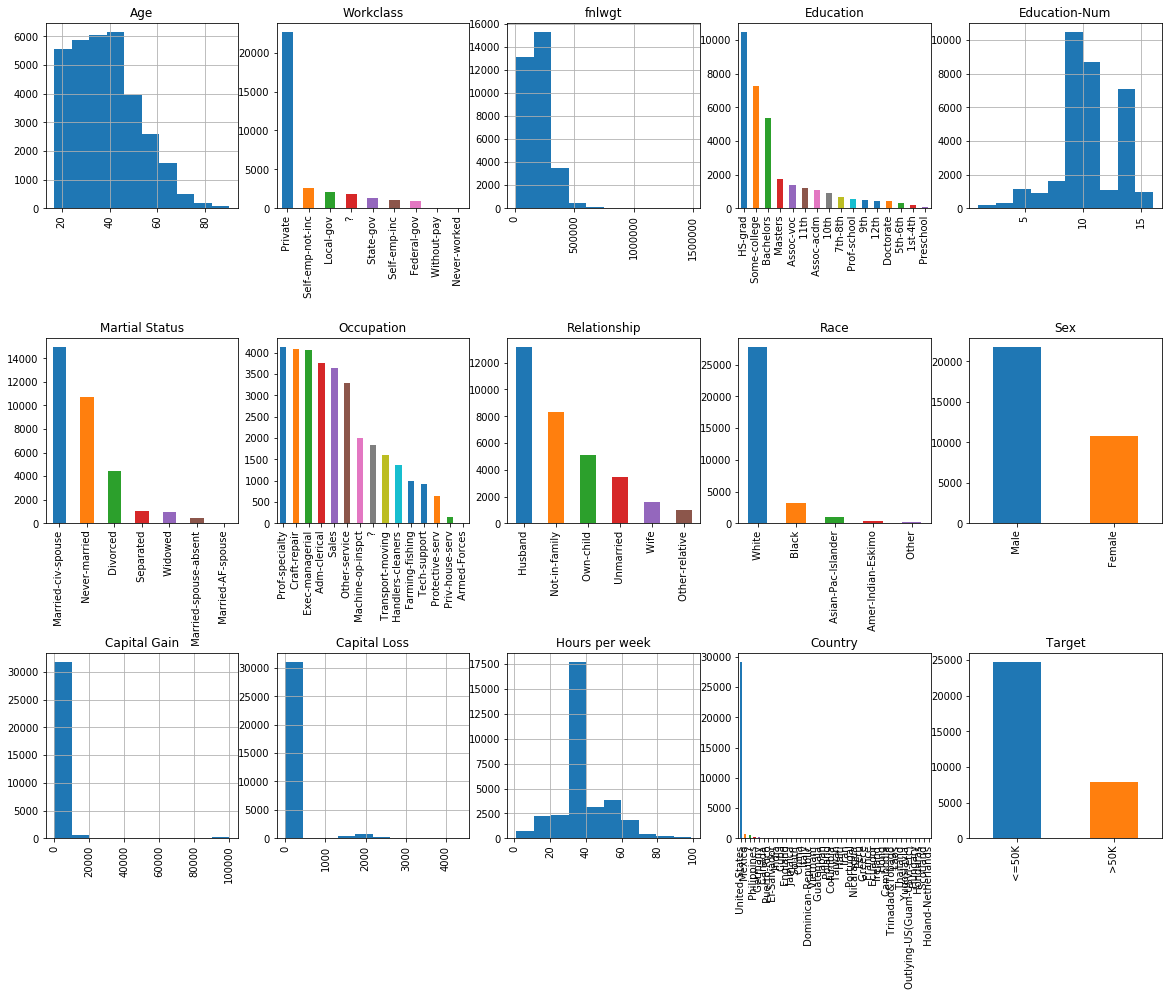

In [118]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(train_df.shape[1]) / cols)
for i, column in enumerate(train_df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train_df.dtypes[column] == np.object:
        train_df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train_df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [102]:
(train_df["Country"].value_counts() / train_df.shape[0]).head()

 United-States    0.895857
 Mexico           0.019748
 ?                0.017905
 Philippines      0.006081
 Germany          0.004207
Name: Country, dtype: float64

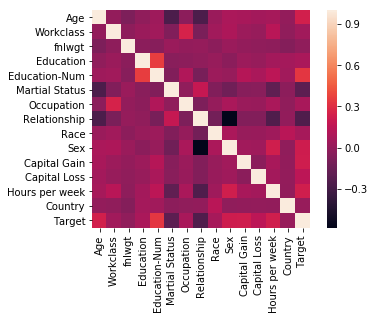

In [105]:

# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(train_df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [106]:
train_df[["Education", "Education-Num"]].head(15)
# del train_df["Education"]

,Education,Education-Num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [107]:
train_df[["Sex", "Relationship"]].head(15)

# Male - Husband; Female - Wife (how to merge these two lists? Weak relation)

,Sex,Relationship
0,Male,Not-in-family
1,Male,Husband
2,Male,Not-in-family
3,Male,Husband
4,Female,Wife
5,Female,Wife
6,Female,Not-in-family
7,Male,Husband
8,Female,Not-in-family
9,Male,Husband


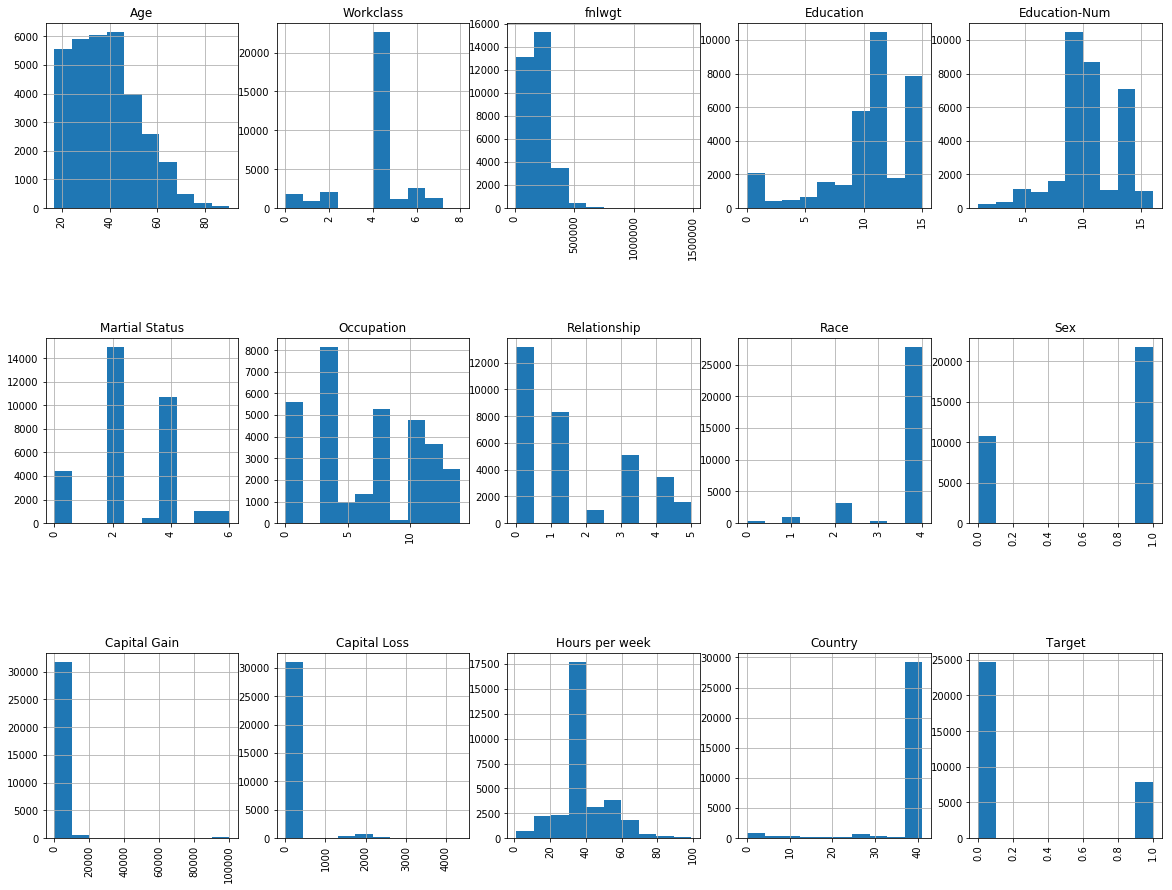

In [116]:

encoded_data, encoders = number_encode_features(train_df)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [135]:
#import sklearn.cross_validation as cross_validation
 
data = encoded_data.drop(['Target'],axis=1,inplace=False)
label = encoded_data['Target']

X_train, X_test, y_train, y_test = train_test_split(data, label, train_size=0.70)   

scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("float64")), columns=X_train.columns)
X_test = scaler.transform(X_test.astype("float64"))


/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


'\nX_train, X_test, y_train, y_test = train_test_split(encoded_data[encoded_data.columns - ["Target"]], encoded_data["Target"], train_size=0.70)\nscaler = preprocessing.StandardScaler()\nX_train = pd.DataFrame(scaler.fit_transform(X_train.astype("f64")), columns=X_train.columns)\nX_test = scaler.transform(X_test.astype("f64"))\n'

/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 score: 0.555324


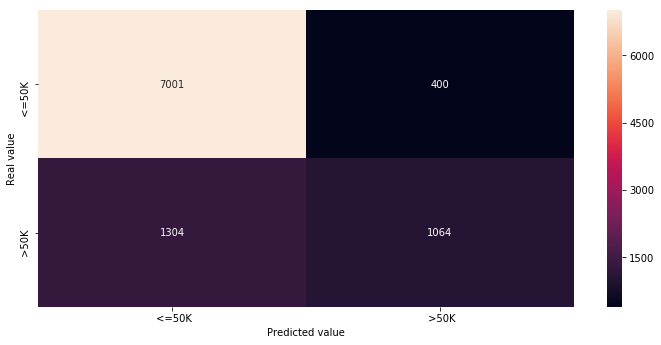

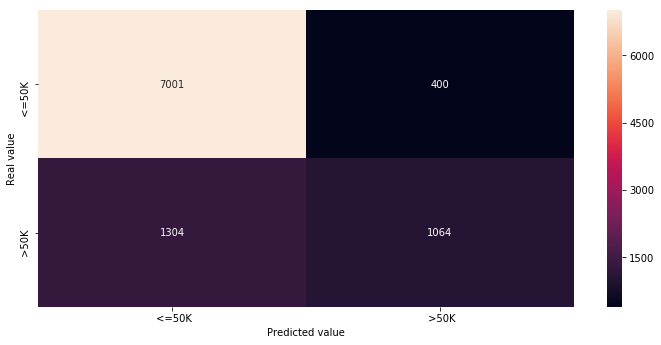

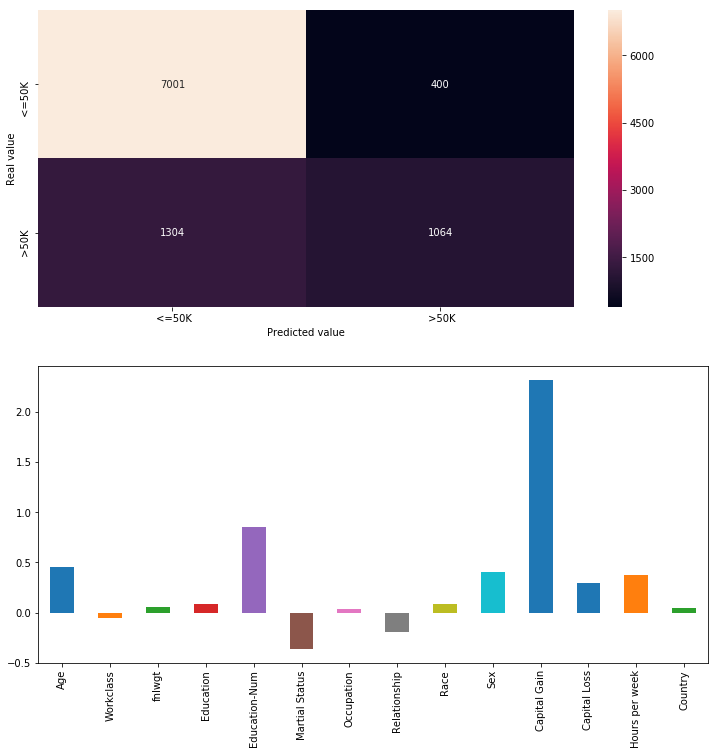

In [141]:
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import sklearn as skl

cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort_values()
plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()

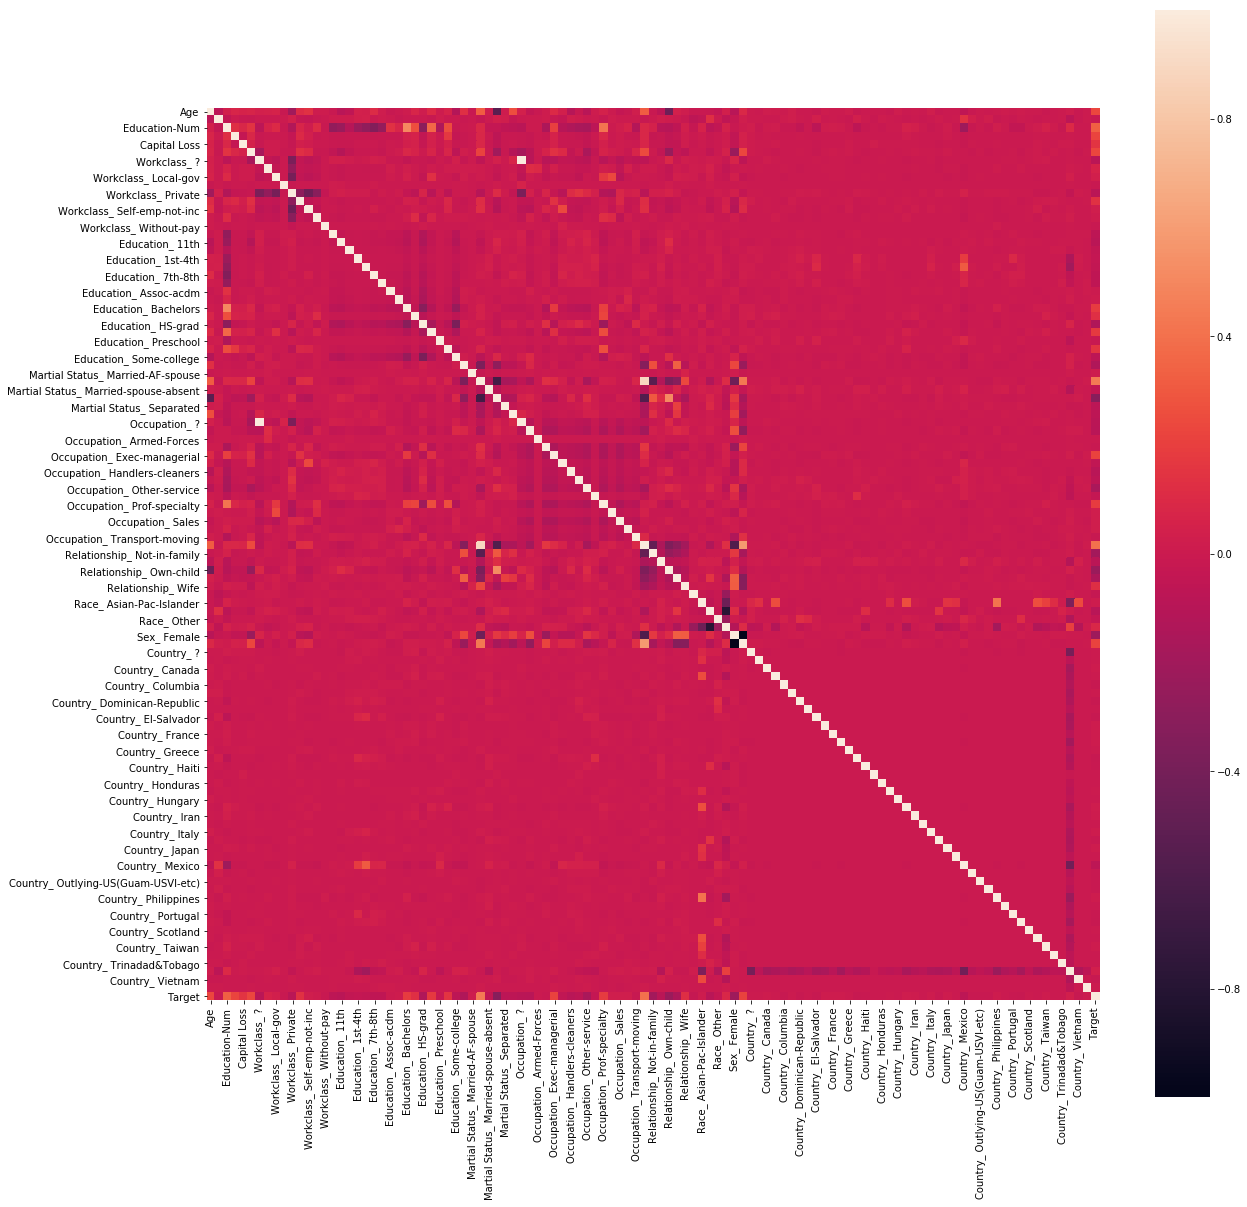

In [148]:
binary_data = pd.get_dummies(train_df)
# Let's fix the Target as it will be converted to dummy vars too
binary_data['Target'] = binary_data['Target_ >50K']


del binary_data["Target_ <=50K"]
del binary_data["Target_ >50K"]
plt.subplots(figsize=(20,20))
sns.heatmap(binary_data.corr(), square=True)
plt.show()


In [149]:
#import sklearn.cross_validation as cross_validation
 
data_b = binary_data.drop(['Target'],axis=1,inplace=False)
label_b = binary_data['Target']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data_b, label_b, train_size=0.70)   
scaler = preprocessing.StandardScaler()
X_train_b = pd.DataFrame(scaler.fit_transform(X_train_b), columns=X_train_b.columns)
X_test_b = scaler.transform(X_test_b)

/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 score: 0.656114


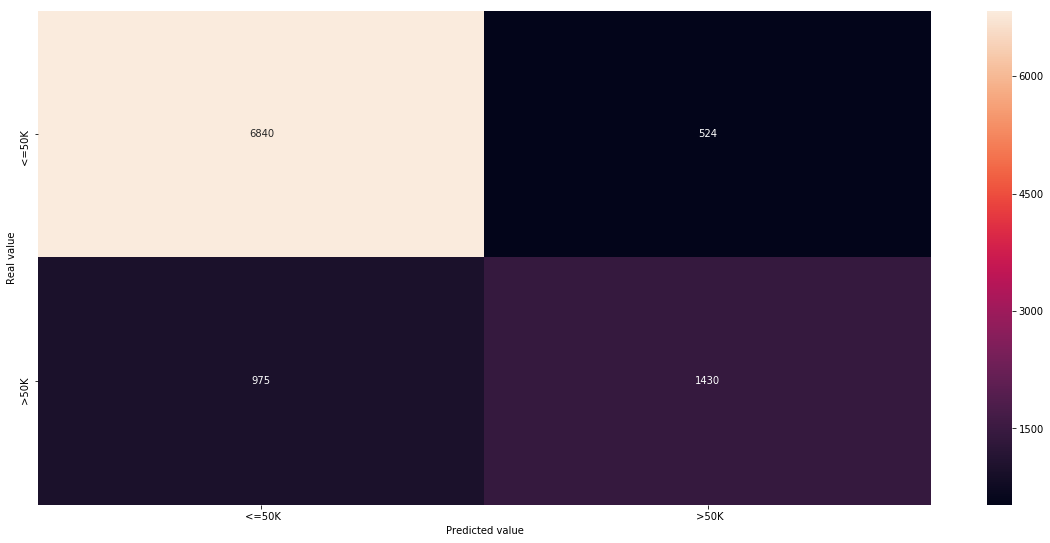

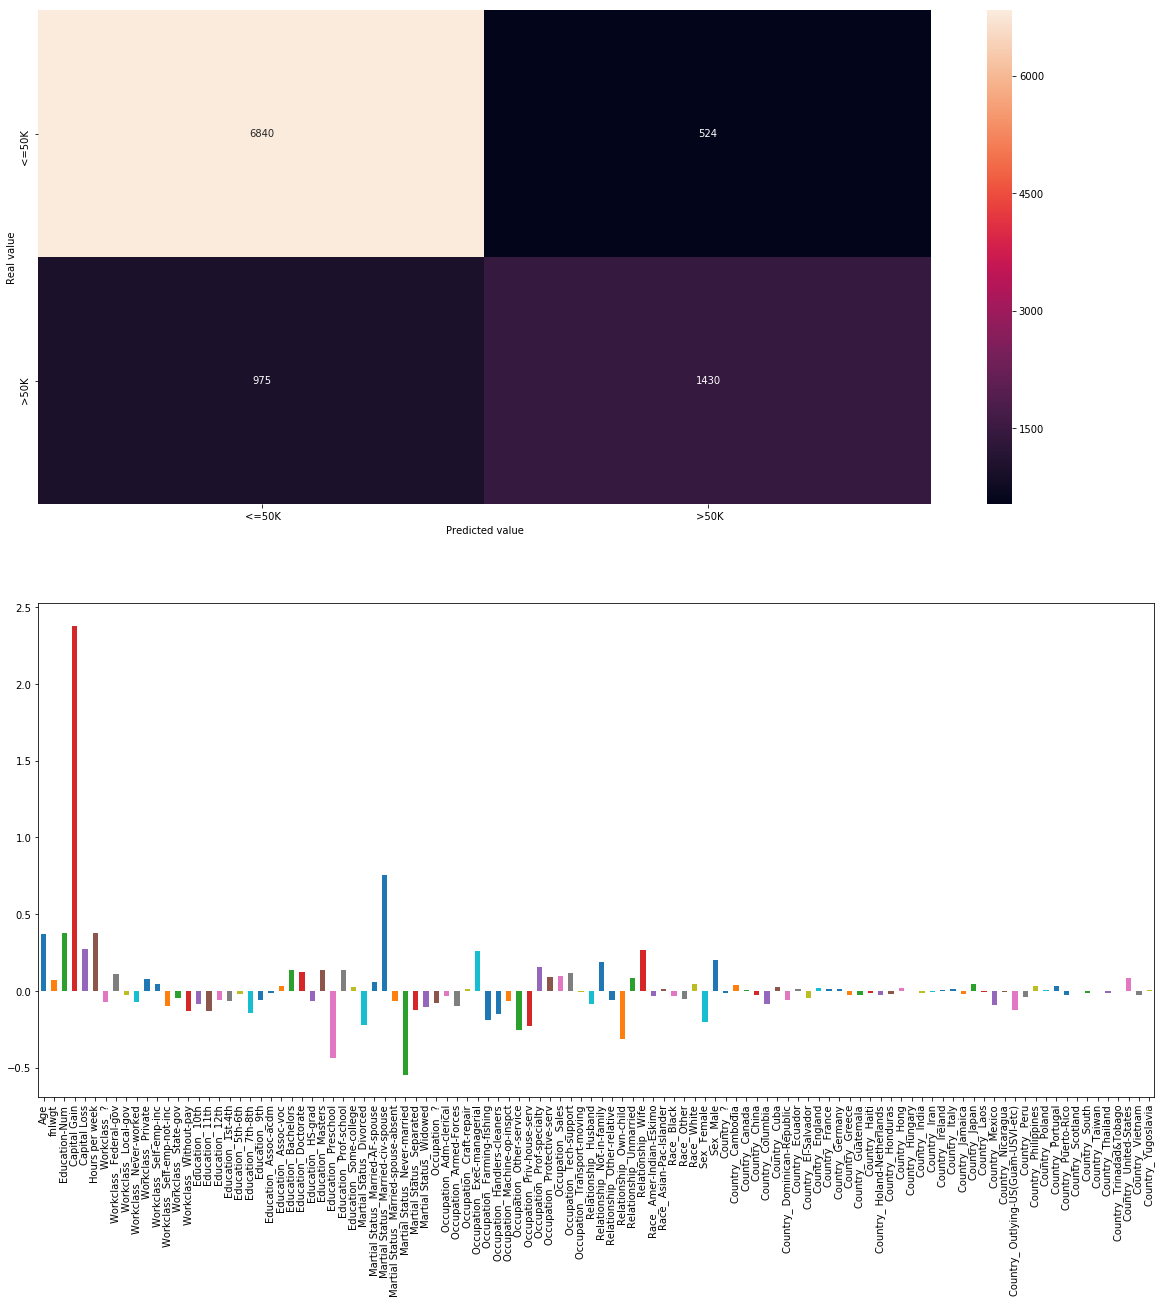

In [152]:
cls = linear_model.LogisticRegression()

cls.fit(X_train_b, y_train_b)
y_pred = cls.predict(X_test_b)
cm = metrics.confusion_matrix(y_test_b, y_pred)

plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print("F1 score: %f" % skl.metrics.f1_score(y_test_b, y_pred))
coefs = pd.Series(cls.coef_[0], index=X_train_b.columns)
coefs.sort_values()
ax = plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()